##### VanderPlas, Jake. 2016. Python Data Science Handbook: Essential Tools for Working with Data. O'Reilly Media. Available at: https://jakevdp.github.io/PythonDataScienceHandbook/

## Hierarchical Indexing

In [1]:
import pandas as pd
import numpy as np

In [22]:
# the bad way of multi indexed series

index = [('California', 2000), ('California', 2010),
         ('New York', 2000), ('New York', 2010),
         ('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
               18976457, 19378102,
               20851820, 25145561]
pop = pd.Series(populations, index=index)
pop

(California, 2000)    33871648
(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
(Texas, 2010)         25145561
dtype: int64

In [3]:
pop[('California', 2010):('Texas', 2000)]

(California, 2010)    37253956
(New York, 2000)      18976457
(New York, 2010)      19378102
(Texas, 2000)         20851820
dtype: int64

In [6]:
pop.index[0][0]

'California'

In [7]:
for i in pop.index:
    if i[1] == 2000:
        print(pop[i])

33871648
18976457
20851820


In [ ]:
pop[[i for i in pop.index if i[1] == 2000]]

In [ ]:
pop

In [8]:
pop[('California', 2000)]

33871648

In [9]:
pop[:, 2000]

KeyError: 'key of type tuple not found and not a MultiIndex'

The Better Way: Pandas MultiIndex

In [24]:
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('California', 2000),
            ('California', 2010),
            (  'New York', 2000),
            (  'New York', 2010),
            (     'Texas', 2000),
            (     'Texas', 2010)],
           )

In [25]:
pop = pop.reindex(index)
pop

California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [26]:
pop["California", :]

2000    33871648
2010    37253956
dtype: int64

MultiIndex as extra dimension

In [27]:
pd.DataFrame(pop, columns = ["population"])

population
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

In [28]:
pop_df = pop.unstack()
pop_df
#from long to wide in Stata

,2000,2010
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [29]:
pop_df.stack()


California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [30]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9267089, 9284094,
                                   4687374, 4318033,
                                   5906301, 6879014]})
pop_df

total  under18
California 2000  33871648  9267089
           2010  37253956  9284094
New York   2000  18976457  4687374
           2010  19378102  4318033
Texas      2000  20851820  5906301
           2010  25145561  6879014

In [31]:
f_u18 = round((pop_df['under18'] / pop_df['total'])*100,2)

In [32]:
f_u18

California  2000    27.36
            2010    24.92
New York    2000    24.70
            2010    22.28
Texas       2000    28.33
            2010    27.36
dtype: float64

In [33]:
f_u18.unstack()

,2000,2010
California,27.36,24.92
New York,24.70,22.28
Texas,28.33,27.36


Explicit MultiIndex constructors

In [34]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [35]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [36]:
pd.MultiIndex.from_product([['a', 'b','c','d'], range(1990,1994)])

MultiIndex([('a', 1990),
            ('a', 1991),
            ('a', 1992),
            ('a', 1993),
            ('b', 1990),
            ('b', 1991),
            ('b', 1992),
            ('b', 1993),
            ('c', 1990),
            ('c', 1991),
            ('c', 1992),
            ('c', 1993),
            ('d', 1990),
            ('d', 1991),
            ('d', 1992),
            ('d', 1993)],
           )

In [37]:
pop.index.names = ['state', 'year']
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

MultiIndex for column

In a DataFrame, the rows and columns are completely symmetric, and just as the rows can have multiple levels of indices, the columns can have multiple levels as well. Consider the following, which is a mock-up of some (somewhat realistic) medical data

...the average heart rate and temperature... 
...years and visits... 
...three guys: Bod, Guido ans Sue...

four dimensional data

In [39]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
                                     names=['subject', 'type'])

# mock some data
data = np.round(np.random.randn(4, 6), 1)

In [40]:
data

array([[ 0.3, -0. ,  2.3, -0.2, -1. ,  0.8],
       [-0.8, -1.2, -0.6,  0.2, -2.1,  1. ],
       [ 1. , -2.1,  2.4,  2.6, -0.6, -0.2],
       [ 2.1,  0.2,  0.7, -0.9, -1.6,  0.1]])

In [41]:
data[:, ::2] *= 10
data += 37

data

array([[40. , 37. , 60. , 36.8, 27. , 37.8],
       [29. , 35.8, 31. , 37.2, 16. , 38. ],
       [47. , 34.9, 61. , 39.6, 31. , 36.8],
       [58. , 37.2, 44. , 36.1, 21. , 37.1]])

In [42]:
# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      40.0  37.0  60.0  36.8  27.0  37.8
     2      29.0  35.8  31.0  37.2  16.0  38.0
2014 1      47.0  34.9  61.0  39.6  31.0  36.8
     2      58.0  37.2  44.0  36.1  21.0  37.1

In [43]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      60.0  36.8
     2      31.0  37.2
2014 1      61.0  39.6
     2      44.0  36.1

In [44]:
health_data['Guido', 'HR']

year  visit
2013  1        60.0
      2        31.0
2014  1        61.0
      2        44.0
Name: (Guido, HR), dtype: float64

In [45]:
health_data.iloc[:2]

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      40.0  37.0  60.0  36.8  27.0  37.8
     2      29.0  35.8  31.0  37.2  16.0  38.0

In [46]:
health_data.iloc[:2,:2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      40.0  37.0
     2      29.0  35.8

In [47]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        40.0
      2        29.0
2014  1        47.0
      2        58.0
Name: (Bob, HR), dtype: float64

Stacking and unstacking indices

In [48]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [49]:
pop.unstack()

year,2000,2010
state,,
California,33871648,37253956
New York,18976457,19378102
Texas,20851820,25145561


In [50]:
pop.unstack(level=0)

state,California,New York,Texas
year,,,
2000,33871648,18976457,20851820
2010,37253956,19378102,25145561


In [51]:
pop.unstack().stack()

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [52]:
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2000,33871648
1,California,2010,37253956
2,New York,2000,18976457
3,New York,2010,19378102
4,Texas,2000,20851820
5,Texas,2010,25145561


In [53]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2000    33871648
           2010    37253956
New York   2000    18976457
           2010    19378102
Texas      2000    20851820
           2010    25145561

Data Aggregations on Multi-Indices

In [54]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      40.0  37.0  60.0  36.8  27.0  37.8
     2      29.0  35.8  31.0  37.2  16.0  38.0
2014 1      47.0  34.9  61.0  39.6  31.0  36.8
     2      58.0  37.2  44.0  36.1  21.0  37.1

In [ ]:
data_mean = health_data.mean(level=0)
data_mean

In [62]:
data_mean = health_data.groupby(level='year').mean()
data_mean

subject   Bob        Guido          Sue       
type       HR   Temp    HR   Temp    HR   Temp
year                                          
2013     34.5  36.40  45.5  37.00  21.5  37.90
2014     52.5  36.05  52.5  37.85  26.0  36.95

In [63]:
pop

state       year
California  2000    33871648
            2010    37253956
New York    2000    18976457
            2010    19378102
Texas       2000    20851820
            2010    25145561
dtype: int64

In [65]:
#pop.mean(level='state')

In [66]:
#pop.mean(level='year')

In [67]:
pop.groupby(level='state').mean()

state
California    35562802.0
New York      19177279.5
Texas         22998690.5
dtype: float64

In [68]:
pop.groupby(level='year').mean()

year
2000    2.456664e+07
2010    2.725921e+07
dtype: float64

## Combining Datasets: Concat

In [69]:
import pandas as pd
import numpy as np

In [70]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [72]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=0) # Note that default option is neither axis=0 nor axis=1

array([[1, 2],
       [3, 4],
       [1, 2],
       [3, 4]])

In [73]:
np.shape(x)

(2, 2)

In [75]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
1    D
2    E
3    F
dtype: object

In [76]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [83]:
#different observations, same features
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display(df1, df2, pd.concat([df1, df2], axis = 0))

,A,B
1,A1,B1
2,A2,B2


,A,B
3,A3,B3
4,A4,B4


,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [86]:
#different features, same observations (a more common case while working with real life data)
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
display(df3, df4, pd.concat([df3, df4], axis=0))

,A,B
0,A0,B0
1,A1,B1


,C,D
0,C0,D0
1,C1,D1


,A,B,C,D
0,A0,B0,NaN,NaN
1,A1,B1,NaN,NaN
0,NaN,NaN,C0,D0
1,NaN,NaN,C1,D1


## Merge and Join

In [91]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display(df1, df2)

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [92]:
#One-to-one
df3 = pd.merge(df1, df2)
df3

#The pd.merge() function recognizes that each DataFrame has an "employee" column, and automatically joins using this column as a key. 

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [93]:
#Many-to-one
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display(df3, df4, pd.merge(df3, df4))

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


,employee,group,hire_date,supervisor
0,Bob,Accounting,2008,Carly
1,Jake,Engineering,2012,Guido
2,Lisa,Engineering,2004,Guido
3,Sue,HR,2014,Steve


In [94]:
#Many-to-many
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
display(df1, df5, pd.merge(df1, df5))

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,coding
3,Engineering,linux
4,HR,spreadsheets
5,HR,organization


,employee,group,skills
0,Bob,Accounting,math
1,Bob,Accounting,spreadsheets
2,Jake,Engineering,coding
3,Jake,Engineering,linux
4,Lisa,Engineering,coding
5,Lisa,Engineering,linux
6,Sue,HR,spreadsheets
7,Sue,HR,organization


Specification of the Merge Key

In [95]:
display(df1, df2, pd.merge(df1, df2, on='employee'))

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


In [96]:
df3 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salary': [70000, 80000, 120000, 90000]})
display(df1, df3, pd.merge(df1, df3, left_on="employee", right_on="name"))

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR


,name,salary
0,Bob,70000
1,Jake,80000
2,Lisa,120000
3,Sue,90000


,employee,group,name,salary
0,Bob,Accounting,Bob,70000
1,Jake,Engineering,Jake,80000
2,Lisa,Engineering,Lisa,120000
3,Sue,HR,Sue,90000


In [97]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


In [98]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display(df1a, df2a)

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR


,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012
Sue,2014


In [99]:
display(df1a, df2a,
        pd.merge(df1a, df2a, left_index=False, right_index=False))

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [ ]:
display(df1a, df2a)

In [101]:
pd.merge(df1a, df2a, left_index=True, right_index=True).reset_index()

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


Specifying Set Arithmetic for Joins

In [102]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display(df6, df7, pd.merge(df6, df7))

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


,name,drink
0,Mary,wine
1,Joseph,beer


,name,food,drink
0,Mary,bread,wine


In [103]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


In [104]:
display(df6, df7, pd.merge(df6, df7, how='outer'))

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


,name,drink
0,Mary,wine
1,Joseph,beer


,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine
3,Joseph,NaN,beer


In [106]:
display(df6, df7, pd.merge(df6, df7, how='left'))

,name,food
0,Peter,fish
1,Paul,beans
2,Mary,bread


,name,drink
0,Mary,wine
1,Joseph,beer


,name,food,drink
0,Peter,fish,NaN
1,Paul,beans,NaN
2,Mary,bread,wine


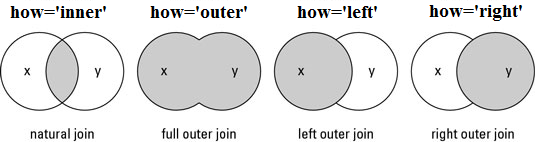

In [107]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display(df8, df9, pd.merge(df8, df9, on="name"))

,name,rank
0,Bob,1
1,Jake,2
2,Lisa,3
3,Sue,4


,name,rank
0,Bob,3
1,Jake,1
2,Lisa,4
3,Sue,2


,name,rank_x,rank_y
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


In [108]:
display(df8, df9, pd.merge(df8, df9, on="name", suffixes=["_L", "_R"]))

,name,rank
0,Bob,1
1,Jake,2
2,Lisa,3
3,Sue,4


,name,rank
0,Bob,3
1,Jake,1
2,Lisa,4
3,Sue,2


,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


## Aggregation and Grouping

An essential piece of analysis of large data is efficient summarization: computing aggregations like sum(), mean(), median(), min(), and max(), in which a single number gives insight into the nature of a potentially large dataset. In this section, we'll explore aggregations in Pandas, from simple operations akin to what we've seen on NumPy arrays, to more sophisticated operations based on the concept of a groupby.

In [1]:
import numpy as np
import pandas as pd

In [ ]:
# pip install seaborn

In [2]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [3]:
planets.head(10)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009
5,Radial Velocity,1,185.840,4.80,76.39,2008
6,Radial Velocity,1,1773.400,4.64,18.15,2002
7,Radial Velocity,1,798.500,NaN,21.41,1996
8,Radial Velocity,1,993.300,10.30,73.10,2008
9,Radial Velocity,2,452.800,1.99,74.79,2010


In [4]:
rng = np.random.RandomState(42)

In [5]:
type(rng)

numpy.random.mtrand.RandomState

In [6]:
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [7]:
ser.sum()

2.811925491708157

In [8]:
ser.mean()

0.5623850983416314

In [9]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [10]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [13]:
df.mean(axis=1) #instead of 'columns', just write 1

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [14]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


GroupBy: Split, Apply, Combine

In [15]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [16]:
df.groupby('key')

In [18]:
df.groupby('key').mean()

,data
key,
A,1.5
B,2.5
C,3.5


In [19]:
planets.groupby('method')

In [20]:
planets.groupby('method')['orbital_period']

In [21]:
planets['orbital_period'].median()

39.9795

In [22]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [24]:
planets.groupby('method')['orbital_period'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,631.180000,544.217663,246.360000,438.770000,631.180000,823.590000,1016.000000
Eclipse Timing Variations,9.0,4751.644444,2499.130945,1916.250000,2900.000000,4343.500000,5767.000000,10220.000000
Imaging,12.0,118247.737500,213978.177277,4639.150000,8343.900000,27500.000000,94250.000000,730000.000000
Microlensing,7.0,3153.571429,1113.166333,1825.000000,2375.000000,3300.000000,3550.000000,5100.000000
Orbital Brightness Modulation,3.0,0.709307,0.725493,0.240104,0.291496,0.342887,0.943908,1.544929
Pulsar Timing,5.0,7343.021201,16313.265573,0.090706,25.262000,66.541900,98.211400,36525.000000
Pulsation Timing Variations,1.0,1170.000000,NaN,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000
Radial Velocity,553.0,823.354680,1454.926210,0.736540,38.021000,360.200000,982.000000,17337.500000
Transit,397.0,21.102073,46.185893,0.355000,3.160630,5.714932,16.145700,331.600590


Aggregate, filter, transform, apply

In [26]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [27]:
#aggregation returns some reduced version of data
df.groupby('key').aggregate([min, np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [28]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


In [29]:
def asd(x):
    return x['data2'].std() > 4

display(df, df.groupby('key').std(), df.groupby('key').filter(asd))

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


,data1,data2
key,,
A,2.12132,1.414214
B,2.12132,4.949747
C,2.12132,4.242641


,key,data1,data2
1,B,1,0
2,C,2,3
4,B,4,7
5,C,5,9


While aggregation must return a reduced version of the data, transformation can return some transformed version of the full data to recombine. For such a transformation, the output is the same shape as the input. A common example is to center the data by subtracting the group-wise mean:

In [30]:
##transformation returns transformed version of data

display(df, df.groupby('key').mean(), df.groupby('key').transform(lambda x: x - x.mean()))

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


,data1,data2
key,,
A,1.5,4.0
B,2.5,3.5
C,3.5,6.0


,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


A lambda function in python is a small anonymous function that can take any number of arguments and execute an expression.

In [31]:
df['data2'].sum()

27

In [32]:
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [33]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] =  x['data1']  / x['data2'].sum()
    return x

display(df, df.groupby('key').apply(norm_by_data2))

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


key     data1  data2
key                       
A   0   A  0.000000      5
    3   A  0.375000      3
B   1   B  0.142857      0
    4   B  0.571429      7
C   2   C  0.166667      3
    5   C  0.416667      9

In [34]:
L = [0, 1, 0, 1, 2, 0]

display(df, df.groupby(L).sum())

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


,key,data1,data2
0,ACC,7,17
1,BA,4,3
2,B,4,7


In [ ]:
display(df, df.groupby(df['key']).sum())

In [ ]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
display(df2, df2.groupby(mapping).sum())

In [ ]:
display(df2, df2.groupby(str.lower).mean())

In [ ]:
df2.groupby([str.lower, mapping]).mean()

#### Grouping example

As an example of this, in a couple lines of Python code we can put all these together and count discovered planets by method and by decade:

In [35]:
planets

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [36]:
decade = 10 * (planets['year'] // 10) # rounded down to the nearest whole number

In [38]:
decade = decade.astype(str) + 's'
decade

0       2000s
1       2000s
2       2010s
3       2000s
4       2000s
        ...  
1030    2000s
1031    2000s
1032    2000s
1033    2000s
1034    2000s
Name: year, Length: 1035, dtype: object

In [39]:
planets['decade']=decade
planets

,method,number,orbital_period,mass,distance,year,decade
0,Radial Velocity,1,269.300000,7.10,77.40,2006,2000s
1,Radial Velocity,1,874.774000,2.21,56.95,2008,2000s
2,Radial Velocity,1,763.000000,2.60,19.84,2011,2010s
3,Radial Velocity,1,326.030000,19.40,110.62,2007,2000s
4,Radial Velocity,1,516.220000,10.50,119.47,2009,2000s
...,...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006,2000s
1031,Transit,1,2.615864,NaN,148.00,2007,2000s
1032,Transit,1,3.191524,NaN,174.00,2007,2000s
1033,Transit,1,4.125083,NaN,293.00,2008,2000s


In [ ]:
#planets.groupby('method')['number'].sum()

In [41]:
planets.groupby(['method','decade'])['number'].sum()

method                         decade
Astrometry                     2010s       2
Eclipse Timing Variations      2000s       5
                               2010s      10
Imaging                        2000s      29
                               2010s      21
Microlensing                   2000s      12
                               2010s      15
Orbital Brightness Modulation  2010s       5
Pulsar Timing                  1990s       9
                               2000s       1
                               2010s       1
Pulsation Timing Variations    2000s       1
Radial Velocity                1980s       1
                               1990s      52
                               2000s     475
                               2010s     424
Transit                        2000s      64
                               2010s     712
Transit Timing Variations      2010s       9
Name: number, dtype: int64

In [42]:
planets.groupby(['method', 'decade'])['number'].sum().unstack(level=1)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,NaN,NaN,NaN,2.0
Eclipse Timing Variations,NaN,NaN,5.0,10.0
Imaging,NaN,NaN,29.0,21.0
Microlensing,NaN,NaN,12.0,15.0
Orbital Brightness Modulation,NaN,NaN,NaN,5.0
Pulsar Timing,NaN,9.0,1.0,1.0
Pulsation Timing Variations,NaN,NaN,1.0,NaN
Radial Velocity,1.0,52.0,475.0,424.0
Transit,NaN,NaN,64.0,712.0


In [43]:
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

year,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0
